Since I could not find some of the files in the project directory,I loaded them separately.

In [13]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import os
import matplotlib.pyplot as plt
import sys
import pickle
from sklearn import preprocessing
from time import time
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import accuracy_score
# from sklearn.grid_search import GridSearchCV
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score
from sklearn.metrics import classification_report
from sklearn.model_selection import train_test_split
from sklearn.ensemble import AdaBoostClassifier
from sklearn.linear_model import LogisticRegression
from sklearn import svm
from sklearn.metrics import accuracy_score
from sklearn.ensemble import RandomForestClassifier
import xgboost


# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory
import sys
import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

sys.path.append('/kaggle/input/my-input/')
from feature_format import featureFormat
from feature_format import targetFeatureSplit

# You can write up to 5GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/unixfile/final_project_dataset_unix.pkl
/kaggle/input/enron-email-dataset/emails.csv
/kaggle/input/my-input/tester.py
/kaggle/input/my-input/final_project_dataset.pkl
/kaggle/input/my-input/feature_format.py


Importing the self uploaded pkl file

In [2]:
original = "/kaggle/input/my-input/final_project_dataset.pkl"
destination = "final_project_dataset_unix.pkl"

content = ''
outsize = 0
with open(original, 'rb') as infile:
    content = infile.read()
with open(destination, 'wb') as output:
    for line in content.splitlines():
        outsize += len(line) + 1
        output.write(line + str.encode('\n'))

Eliminating *Total* Column

Strength: 145
METTS MARK 
 {'salary': 365788, 'to_messages': 807, 'deferral_payments': 'NaN', 'total_payments': 1061827, 'loan_advances': 'NaN', 'bonus': 600000, 'email_address': 'mark.metts@enron.com', 'restricted_stock_deferred': 'NaN', 'deferred_income': 'NaN', 'total_stock_value': 585062, 'expenses': 94299, 'from_poi_to_this_person': 38, 'exercised_stock_options': 'NaN', 'from_messages': 29, 'other': 1740, 'from_this_person_to_poi': 1, 'poi': False, 'long_term_incentive': 'NaN', 'shared_receipt_with_poi': 702, 'restricted_stock': 585062, 'director_fees': 'NaN'}


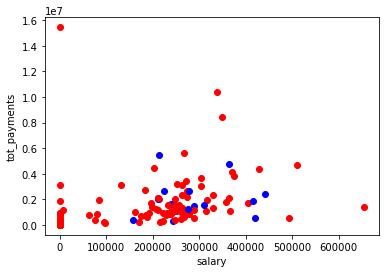

In [4]:
data_dict = pickle.load(open("/kaggle/input/unixfile/final_project_dataset_unix.pkl", 'rb') )

data_dict.pop('TOTAL')
fbase = featureFormat(data_dict, ['poi','salary','total_payments'])
# featureFormat()
print("Strength:",len(data_dict))
print(list(data_dict.keys())[0],"\n",data_dict[list(data_dict.keys())[0]])

for key in range(len(fbase)):
    if fbase[key][1]<1000000:
        if fbase[key][0]==True:
            plt.scatter(fbase[key][1],fbase[key][2],color = 'b')
        else:
            plt.scatter(fbase[key][1],fbase[key][2],color = 'r')
            
plt.ylabel('tot_payments')
plt.xlabel('salary')   
plt.show()
            

Some plots depicting various relations

13  out of  18  poi have deffereal payments 0  & 
 7  out of  18  poi have deffered income 0


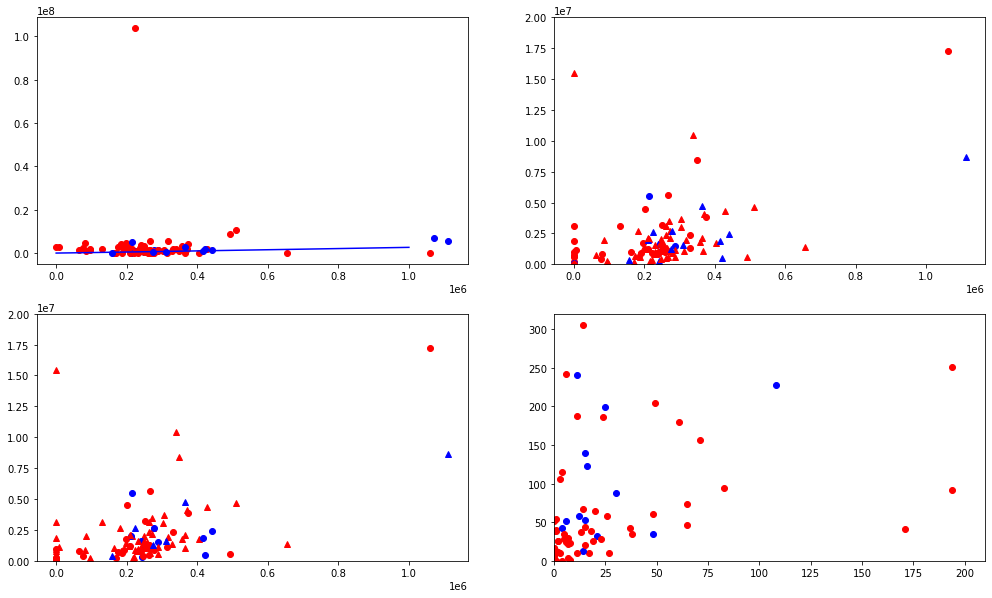

In [5]:
f1 = featureFormat(data_dict,['poi','salary','bonus'])
f2 = featureFormat(data_dict,['poi','salary','total_payments','deferral_payments'])
f3 = featureFormat(data_dict,['poi','salary','total_payments','deferred_income'])
f4 =  featureFormat(data_dict,['poi','from_this_person_to_poi','from_poi_to_this_person'])
fig,a =  plt.subplots(2,2,squeeze=False,figsize=(17,10))
a[0][1].set(ylim=(0, 20000000))
a[1][0].set(ylim=(0, 20000000))
a[1][1].set(xlim=(0,210), ylim=(0,320))
for key in range(len(f1)):
    if f1[key][0] == True:
         a[0][0].scatter(f1[key][1],f1[key][2],color = 'b')
    else:
        a[0][0].scatter(f1[key][1],f2[key][2],color = 'r')
x = np.arange(0,1000000,0.1)
# a[0][0].ylabel('bonus')
# a[0][0].xlabel('salary')  
a[0][0].plot(x,x**1.07,'b')

count = 0
subcount = 0
for key in range(len(f2)):
    if f2[key][0] == True:
        count+=1
        if f2[key][3]==0:
             a[0][1].plot(f2[key][1],f2[key][2],'b^')
             subcount+=1
        else:
            a[0][1].plot(f2[key][1],f2[key][2],'bo')
    else:
        if f2[key][3]==0:
            a[0][1].plot(f2[key][1],f2[key][2],'r^')
        else:
            a[0][1].plot(f2[key][1],f2[key][2],'ro')

count1  = 0
subcount1 = 0
for key in range(len(f3)):
    if f3[key][0] == True:
        count1+=1
        if f3[key][3]==0:
             a[1][0].plot(f3[key][1],f3[key][2],'b^')
             subcount1+=1
        else:
            a[1][0].plot(f3[key][1],f3[key][2],'bo')
    else:
        if f3[key][3]==0:
            a[1][0].plot(f3[key][1],f3[key][2],'r^')
        else:
            a[1][0].plot(f3[key][1],f3[key][2],'ro')

for key in range(len(f4)):
    if f4[key][0] == True:
         a[1][1].scatter(f4[key][1],f4[key][2],color = 'b')
    else:
        a[1][1].scatter(f4[key][1],f4[key][2],color = 'r')

print(subcount," out of ",count," poi have deffereal payments 0"," & \n",subcount1," out of ",count1," poi have deffered income 0")
plt.show()

Adding modified features

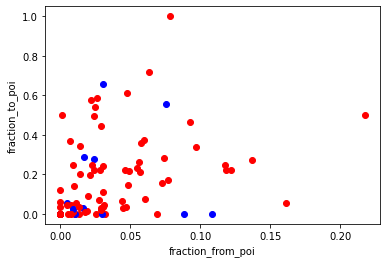

In [6]:
def listmaker(key,normalizer):
    new_list=[]

    for i in data_dict:
        if data_dict[i][key]=="NaN" or data_dict[i][normalizer]=="NaN":
            new_list.append(0.)
        elif data_dict[i][key]>=0:
            new_list.append(float(data_dict[i][key])/float(data_dict[i][normalizer]))
    return new_list

fraction_from_poi_email=listmaker("from_poi_to_this_person","to_messages")
fraction_to_poi_email=listmaker("from_this_person_to_poi","from_messages")
j = 0
for i in data_dict:
    data_dict[i]["fraction_from_poi_email"]=fraction_from_poi_email[j]
    data_dict[i]["fraction_to_poi_email"]=fraction_to_poi_email[j]
    j+=1
    
features_list = ['poi','shared_receipt_with_poi','fraction_from_poi_email','fraction_to_poi_email']
features_list2 = ['poi','shared_receipt_with_poi','fraction_from_poi_email','fraction_to_poi_email','deferral_payments']
data = featureFormat(data_dict, features_list2)
value , features = targetFeatureSplit(data)

for key in range(len(data)):
    if fbase[key][0]==True:
        plt.scatter(data[key][2],data[key][3],color = 'b')
    else:
        plt.scatter(data[key][2],data[key][3],color = 'r')
# plt.scatter(abc[:][0],abc[:][1])

plt.ylabel('fraction_to_poi')
plt.xlabel('fraction_from_poi')   
plt.show()
X_train, X_test, Y_train, Y_test = train_test_split(features, value, test_size = 0.1)    

Introducing various classifiers and regressions 

In [7]:
from sklearn.model_selection import StratifiedKFold,RandomizedSearchCV

from sklearn.metrics import f1_score

clf = xgboost.XGBClassifier()
reg = LogisticRegression()
reg2 = svm.SVC()
reg3 = RandomForestClassifier(max_depth=10, criterion = 'entropy')
model = AdaBoostClassifier(n_estimators=100,base_estimator = reg3)
# reg3.fit(X_train,Y_train)
# print(accuracy_score(Y_test, model.predict(X_test)))
# model.predict(X_test)

In [14]:
import warnings
warnings.filterwarnings('ignore')

model.fit(X_train,Y_train)
skf = StratifiedKFold(n_splits = 8)
f1sc = np.array(features)
v1 = np.array(value)
acc = []
for train_index, test_index in skf.split(f1sc, v1):
    X1_train, X1_test = f1sc[train_index], f1sc[test_index]
    Y1_train, Y1_test = v1[train_index], v1[test_index]
    model.fit(X1_train,Y1_train)
    acc.append(accuracy_score(Y1_test,model.predict(X1_test)))
    print('weighted f1-score:',float(classification_report(np.array(Y1_test),np.array(model.predict(X1_test)))[311:315]))
print(acc)

weighted f1-score: 0.85
weighted f1-score: 0.91
weighted f1-score: 0.91
weighted f1-score: 0.85
weighted f1-score: 0.78
weighted f1-score: 0.78
weighted f1-score: 0.79
weighted f1-score: 1.0
[0.8461538461538461, 0.9230769230769231, 0.9230769230769231, 0.8461538461538461, 0.8461538461538461, 0.8461538461538461, 0.75, 1.0]


In [16]:
parameters = {
    'learning_rate' : [0.2 , 0.3 , 0.5 , 0.6],
    'gamma' : [0, 0.2, 0.5, 0.8],
    'max_depth' : [3, 4, 6, 8, 10],
    'min_child_weight' : [0.5, 1, 2, 4, 6],
}

rnd_search = RandomizedSearchCV(clf,param_distributions=parameters,cv = 8,n_jobs = -1,scoring = 'accuracy')
rnd_search.fit(f1sc, v1)
clf2 = rnd_search.best_estimator_
accuracy2 = []
i = 0
for train_index, test_index in skf.split(f1sc, v1):
    X1_train, X1_test = f1sc[train_index], f1sc[test_index]
    Y1_train, Y1_test = v1[train_index], v1[test_index]
    clf2.fit(X1_train,Y1_train)
    accuracy2.append(accuracy_score(Y1_test,clf2.predict(X1_test)))
    print('weighted f1-score:',float(classification_report(np.array(Y1_test),np.array(clf2.predict(X1_test)))[311:315]))
    
print(accuracy2)

weighted f1-score: 0.85
weighted f1-score: 0.91
weighted f1-score: 0.78
weighted f1-score: 0.79
weighted f1-score: 0.78
weighted f1-score: 0.78
weighted f1-score: 0.79
weighted f1-score: 1.0
[0.8461538461538461, 0.9230769230769231, 0.8461538461538461, 0.7692307692307693, 0.8461538461538461, 0.8461538461538461, 0.75, 1.0]


In [20]:
param = {
    'n_estimators' : [80 , 100 , 120 , 150],
    'max_depth' : [3, 4, 6, 8, 10],
    'min_samples_split' : [2, 3]
}
rnd = RandomizedSearchCV(reg3,param_distributions=param,cv = 8,n_jobs = -1,scoring = 'f1')
rnd.fit(f1sc,v1)
reg3_ = rnd.best_estimator_

accuracy3 = []
for train_index, test_index in skf.split(f1sc, v1):
    X2_train, X2_test = f1sc[train_index], f1sc[test_index]
    Y2_train, Y2_test = v1[train_index], v1[test_index]
    reg3_.fit(X2_train,Y2_train)
    accuracy3.append(accuracy_score(Y2_test,reg3_.predict(X2_test)))
    print('weighted f1-score:',float(classification_report(np.array(Y2_test),np.array(reg3_.predict(X2_test)))[311:315]))
    
print(accuracy3)

weighted f1-score: 0.85
weighted f1-score: 0.91
weighted f1-score: 0.91
weighted f1-score: 0.85
weighted f1-score: 0.78
weighted f1-score: 0.78
weighted f1-score: 0.79
weighted f1-score: 0.9
[0.8461538461538461, 0.9230769230769231, 0.9230769230769231, 0.8461538461538461, 0.8461538461538461, 0.8461538461538461, 0.75, 0.9166666666666666]


In [21]:
accuracy4 = []
for train_index, test_index in skf.split(f1sc, v1):
    X3_train, X3_test = f1sc[train_index], f1sc[test_index]
    Y3_train, Y3_test = v1[train_index], v1[test_index]
    reg2.fit(X3_train,Y3_train)
    accuracy4.append(accuracy_score(Y3_test,reg2.predict(X3_test)))
    print('weighted f1-score:',float(classification_report(np.array(Y3_test),np.array(reg2.predict(X3_test)))[311:315]))
    
print(accuracy4)

weighted f1-score: 0.78
weighted f1-score: 0.78
weighted f1-score: 0.78
weighted f1-score: 0.78
weighted f1-score: 0.78
weighted f1-score: 0.78
weighted f1-score: 0.88
weighted f1-score: 0.76
[0.8461538461538461, 0.8461538461538461, 0.8461538461538461, 0.8461538461538461, 0.8461538461538461, 0.8461538461538461, 0.9166666666666666, 0.8333333333333334]


We conclude with the best classifier being XGboost giving accuracy ~ 0.92

In [22]:
pickle.dump(clf2, open("best_classifier.pkl", "wb") )
pickle.dump(data_dict, open("dataset_out.pkl", "wb") )
pickle.dump(features_list2, open("final_features.pkl", "wb") )